<a href="https://colab.research.google.com/github/Fazlibeqir/Timski-Proekt/blob/main/train_v2_augmented.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Setup & Imports

In [1]:
!pip install ultralytics==8.3.153 --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 20.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 72.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 60.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 38.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 105.9 MB/s eta 0:00:00


In [2]:
!pip install sympy==1.13.1 --force-reinstall

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 73.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.2/536.2 kB 43.0 MB/s eta 0:00:00
  Attempting uninstall: mpmath
    Found existing installation: mpmath 1.3.0
    Uninstalling mpmath-1.3.0:
      Successfully uninstalled mpmath-1.3.0
  Attempting uninstall: sympy
    Found existing installation: sympy 1.13.1
    Uninstalling sympy-1.13.1:
      Successfully uninstalled sympy-1.13.1


In [3]:
from ultralytics import YOLO
import torch
import os

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


If locally needs GPU

In [4]:
!pip show ultralytics


Name: ultralytics
Version: 8.3.153
Summary: Ultralytics YOLO 🚀 for SOTA object detection, multi-object tracking, instance segmentation, pose estimation and image classification.
Home-page: https://ultralytics.com
Author: 
Author-email: Glenn Jocher <glenn.jocher@ultralytics.com>, Jing Qiu <jing.qiu@ultralytics.com>
License: AGPL-3.0
Location: /usr/local/lib/python3.11/dist-packages
Requires: matplotlib, numpy, opencv-python, pandas, pillow, psutil, py-cpuinfo, pyyaml, requests, scipy, torch, torchvision, tqdm, ultralytics-thop
Required-by: 


In [5]:
# Check GPU
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using device: {device}")

Using device: cuda


## Dataset Check (Optional)
If you want to double-check that your dataset is correctly placed and has the expected files:

/content/drive/MyDrive/Insect Detection/dataset.zip

In [6]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [7]:
!ls -lh /content/drive/MyDrive/Insect\ Detection/

total 4.2G
-rw------- 1 root root 4.2G Jun  9 17:42 cleaned_dataset.zip
-rw------- 1 root root 399K Jun 11 20:06 compare_all_versions.ipynb
-rw------- 1 root root 1.6K Jun 12 02:07 compared_models.ipynb
-rw------- 1 root root  15K May 30 22:00 fetch_data.ipynb
-rw------- 1 root root  324 May 29 23:17 test_and_eval.ipynb
-rw------- 1 root root 1.5M Jun 11 18:03 train_v1_baseline.ipynb
-rw------- 1 root root  11K Jun 12 13:30 train_v2_augmented.ipynb
-rw------- 1 root root 1.5M Jun 11 18:41 train_v3_bigger_model.ipynb
drwx------ 2 root root 4.0K May 28 16:56 utils
-rw------- 1 root root 909K May 28 16:44 YOLO8.ipynb


In [8]:
!cp /content/drive/MyDrive/Insect\ Detection/cleaned_dataset.zip .

In [9]:
!unzip -q cleaned_dataset.zip -d .

In [10]:
from pathlib import Path

#dataset is extracted into /content/dataset/content/dataset
base_path = Path("/content/dataset/content/dataset")
for split in ['train','test', 'val']:
    split_path = base_path / split
    image_count = len(list(split_path.rglob('*.jpg')))
    print(f"{split.capitalize()} images: {image_count}")

Train images: 1766
Test images: 384
Val images: 391


## Load and Train the Baseline Model

In [20]:
# Load YOLOv8 baseline
model = YOLO('yolov8m-cls.pt')


# Train the model
model.train(
    data=base_path,
    epochs=40,
    imgsz=224,
    batch=64,
    patience = 7,
    workers = 4,
    device=0 if torch.cuda.is_available() else 'cpu',
    name='yolov8m-cls_augmented',
    augment=True,
)

New https://pypi.org/project/ultralytics/8.3.154 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.153 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=64, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/dataset/content/dataset, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=40, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=224, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8m-cls.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov8m-cls_augmented4, nbs=64, nms=False, opse

train: Scanning /content/dataset/content/dataset/train... 3514 images, 0 corrupt: 100%|██████████| 3514/3514 [00:00<?, ?it/s]


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 341.6±109.9 MB/s, size: 1448.8 KB)


val: Scanning /content/dataset/content/dataset/val... 748 images, 0 corrupt: 100%|██████████| 748/748 [00:00<?, ?it/s]


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000161, momentum=0.9) with parameter groups 38 weight(decay=0.0), 39 weight(decay=0.0005), 39 bias(decay=0.0)
Image sizes 224 train, 224 val
Using 2 dataloader workers
Logging results to runs/classify/yolov8m-cls_augmented4
Starting training for 40 epochs...

      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:16<00:00,  2.77s/it]

                   all     0.0428      0.167



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:14<00:00,  2.37s/it]

                   all      0.146      0.412



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:16<00:00,  2.76s/it]

                   all      0.261      0.603



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:13<00:00,  2.26s/it]

                   all      0.369      0.705



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:16<00:00,  2.77s/it]

                   all      0.445      0.779



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:14<00:00,  2.43s/it]

                   all      0.496      0.816



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:16<00:00,  2.68s/it]

                   all      0.527       0.85



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:20<00:00,  3.49s/it]

                   all      0.556      0.876



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:15<00:00,  2.66s/it]

                   all      0.567      0.878



      Epoch    GPU_mem       loss  Instances       Size


      10/40         3G      1.058         58        224: 100%|██████████| 55/55 [02:23<00:00,  2.62s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:14<00:00,  2.48s/it]

                   all      0.606      0.894



      Epoch    GPU_mem       loss  Instances       Size


      11/40         3G     0.9187         58        224: 100%|██████████| 55/55 [02:22<00:00,  2.59s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:19<00:00,  3.31s/it]

                   all      0.623      0.893



      Epoch    GPU_mem       loss  Instances       Size


      12/40      3.01G     0.8018         58        224: 100%|██████████| 55/55 [02:28<00:00,  2.70s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:16<00:00,  2.71s/it]

                   all      0.635      0.912



      Epoch    GPU_mem       loss  Instances       Size


      13/40      3.01G     0.7161         58        224: 100%|██████████| 55/55 [02:26<00:00,  2.66s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:20<00:00,  3.36s/it]

                   all       0.65      0.913



      Epoch    GPU_mem       loss  Instances       Size


      14/40      3.01G     0.6566         58        224: 100%|██████████| 55/55 [02:23<00:00,  2.61s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:14<00:00,  2.37s/it]

                   all      0.655      0.917



      Epoch    GPU_mem       loss  Instances       Size


      15/40      3.01G     0.5649         58        224: 100%|██████████| 55/55 [02:43<00:00,  2.97s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:15<00:00,  2.61s/it]

                   all       0.66      0.913



      Epoch    GPU_mem       loss  Instances       Size


      16/40      3.03G     0.5284         58        224: 100%|██████████| 55/55 [02:31<00:00,  2.75s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:15<00:00,  2.66s/it]

                   all      0.674      0.909



      Epoch    GPU_mem       loss  Instances       Size


      17/40      3.03G     0.4431         58        224: 100%|██████████| 55/55 [02:30<00:00,  2.74s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:17<00:00,  2.98s/it]

                   all       0.67      0.914



      Epoch    GPU_mem       loss  Instances       Size


      18/40      3.03G     0.4264         58        224: 100%|██████████| 55/55 [02:29<00:00,  2.72s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:17<00:00,  2.89s/it]

                   all      0.678      0.916



      Epoch    GPU_mem       loss  Instances       Size


      19/40      3.03G     0.3875         58        224: 100%|██████████| 55/55 [02:28<00:00,  2.70s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:15<00:00,  2.63s/it]

                   all      0.675       0.91



      Epoch    GPU_mem       loss  Instances       Size


      20/40      3.06G     0.3646         58        224: 100%|██████████| 55/55 [02:25<00:00,  2.65s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:17<00:00,  2.99s/it]

                   all      0.678      0.914



      Epoch    GPU_mem       loss  Instances       Size


      21/40      3.06G     0.3309         58        224: 100%|██████████| 55/55 [02:25<00:00,  2.65s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:19<00:00,  3.17s/it]

                   all      0.694      0.917



      Epoch    GPU_mem       loss  Instances       Size


      22/40      3.06G     0.3039         58        224: 100%|██████████| 55/55 [02:37<00:00,  2.86s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:20<00:00,  3.40s/it]

                   all      0.693      0.924



      Epoch    GPU_mem       loss  Instances       Size


      23/40      3.06G     0.3112         58        224: 100%|██████████| 55/55 [02:43<00:00,  2.97s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:16<00:00,  2.82s/it]

                   all      0.699       0.92



      Epoch    GPU_mem       loss  Instances       Size


      24/40      3.06G     0.2756         58        224: 100%|██████████| 55/55 [02:47<00:00,  3.05s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:17<00:00,  2.91s/it]

                   all      0.691      0.922



      Epoch    GPU_mem       loss  Instances       Size


      25/40      3.06G     0.2678         58        224: 100%|██████████| 55/55 [02:42<00:00,  2.96s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:17<00:00,  2.95s/it]

                   all      0.693      0.914



      Epoch    GPU_mem       loss  Instances       Size


      26/40      3.06G      0.259         58        224: 100%|██████████| 55/55 [02:53<00:00,  3.15s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:15<00:00,  2.66s/it]

                   all      0.697      0.926



      Epoch    GPU_mem       loss  Instances       Size


      27/40      3.06G     0.2274         58        224: 100%|██████████| 55/55 [03:00<00:00,  3.28s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:15<00:00,  2.65s/it]

                   all       0.69      0.922



      Epoch    GPU_mem       loss  Instances       Size


      28/40      3.06G     0.2396         58        224: 100%|██████████| 55/55 [02:59<00:00,  3.26s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:16<00:00,  2.80s/it]

                   all      0.695      0.917



      Epoch    GPU_mem       loss  Instances       Size


      29/40      3.06G     0.2364         58        224: 100%|██████████| 55/55 [03:00<00:00,  3.28s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:23<00:00,  3.98s/it]

                   all      0.711      0.921



      Epoch    GPU_mem       loss  Instances       Size


      30/40      3.06G     0.2184         58        224: 100%|██████████| 55/55 [02:56<00:00,  3.22s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:16<00:00,  2.76s/it]

                   all      0.699      0.922



      Epoch    GPU_mem       loss  Instances       Size


      31/40      3.06G      0.209         58        224: 100%|██████████| 55/55 [02:32<00:00,  2.78s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:20<00:00,  3.47s/it]

                   all      0.695      0.924



      Epoch    GPU_mem       loss  Instances       Size


      32/40      3.06G     0.2095         58        224: 100%|██████████| 55/55 [02:30<00:00,  2.75s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:12<00:00,  2.09s/it]

                   all      0.694      0.924



      Epoch    GPU_mem       loss  Instances       Size


      33/40      3.06G     0.2083         58        224: 100%|██████████| 55/55 [02:36<00:00,  2.84s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:18<00:00,  3.04s/it]

                   all      0.694      0.922



      Epoch    GPU_mem       loss  Instances       Size


      34/40      3.06G     0.1935         58        224: 100%|██████████| 55/55 [02:26<00:00,  2.67s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:18<00:00,  3.07s/it]

                   all      0.701      0.926



      Epoch    GPU_mem       loss  Instances       Size


      35/40      3.06G     0.1994         58        224: 100%|██████████| 55/55 [02:34<00:00,  2.80s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:14<00:00,  2.40s/it]

                   all      0.707      0.926



      Epoch    GPU_mem       loss  Instances       Size


      36/40      3.06G     0.1941         58        224: 100%|██████████| 55/55 [02:25<00:00,  2.64s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:15<00:00,  2.64s/it]

                   all      0.706      0.916



      Epoch    GPU_mem       loss  Instances       Size


      37/40      3.06G     0.1987         58        224: 100%|██████████| 55/55 [02:28<00:00,  2.71s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:18<00:00,  3.12s/it]

                   all      0.705      0.917



      Epoch    GPU_mem       loss  Instances       Size


      38/40      3.06G      0.189         58        224: 100%|██████████| 55/55 [02:34<00:00,  2.81s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:16<00:00,  2.81s/it]

                   all      0.709       0.92



      Epoch    GPU_mem       loss  Instances       Size


      39/40      3.06G     0.1858         58        224: 100%|██████████| 55/55 [02:28<00:00,  2.70s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:18<00:00,  3.07s/it]

                   all      0.707      0.917



      Epoch    GPU_mem       loss  Instances       Size


      40/40      3.06G     0.1914         58        224: 100%|██████████| 55/55 [02:31<00:00,  2.75s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:12<00:00,  2.05s/it]

                   all      0.702      0.917



40 epochs completed in 1.907 hours.
Optimizer stripped from runs/classify/yolov8m-cls_augmented4/weights/last.pt, 31.8MB
Optimizer stripped from runs/classify/yolov8m-cls_augmented4/weights/best.pt, 31.8MB

Validating runs/classify/yolov8m-cls_augmented4/weights/best.pt...
Ultralytics 8.3.153 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8m-cls summary (fused): 42 layers, 15,836,954 parameters, 0 gradients, 41.7 GFLOPs
train: /content/dataset/content/dataset/train... found 3514 images in 58 classes ✅ 
ERROR ❌ val: /content/dataset/content/dataset/val... found 748 images in 57 classes (requires 58 classes, not 57)
ERROR ❌ test: /content/dataset/content/dataset/test... found 748 images in 57 classes (requires 58 classes, not 57)


               classes   top1_acc   top5_acc:   0%|          | 0/6 [00:00<?, ?it/s]

WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.


               classes   top1_acc   top5_acc:  17%|█▋        | 1/6 [00:04<00:24,  4.97s/it]


  0%|          | 0.00/22.2M [00:00<?, ?B/s]
100%|██████████| 22.2M/22.2M [00:00<00:00, 157MB/s]


WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.


               classes   top1_acc   top5_acc:  33%|███▎      | 2/6 [00:07<00:15,  3.76s/it]

WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.


               classes   top1_acc   top5_acc:  50%|█████     | 3/6 [00:12<00:12,  4.19s/it]

WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.


               classes   top1_acc   top5_acc:  67%|██████▋   | 4/6 [00:18<00:09,  4.79s/it]

WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.


               classes   top1_acc   top5_acc:  83%|████████▎ | 5/6 [00:22<00:04,  4.73s/it]

WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.


               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:25<00:00,  4.31s/it]


                   all      0.707      0.926
Speed: 0.1ms preprocess, 0.9ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/yolov8m-cls_augmented4


ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x782710293650>
curves: []
curves_results: []
fitness: 0.8168449103832245
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.7072192430496216, 'metrics/accuracy_top5': 0.9264705777168274, 'fitness': 0.8168449103832245}
save_dir: PosixPath('runs/classify/yolov8m-cls_augmented4')
speed: {'preprocess': 0.08246218983932876, 'inference': 0.9204160347547059, 'loss': 9.776604055852834e-05, 'postprocess': 0.00033890641387256316}
task: 'classify'
top1: 0.7072192430496216
top5: 0.9264705777168274

In [30]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## View Results (Optional)

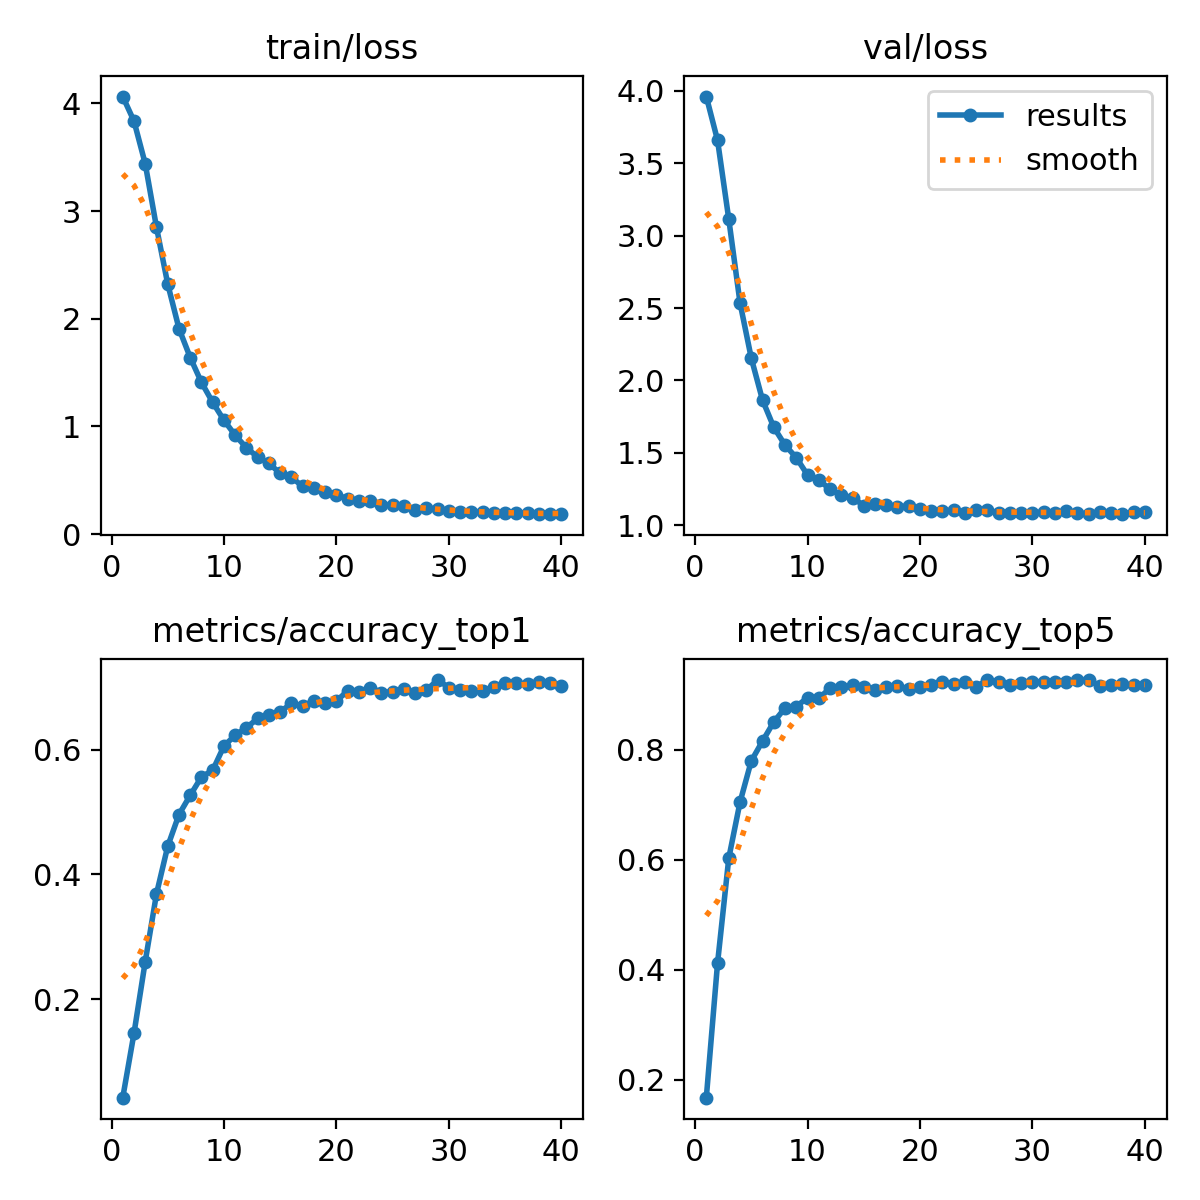

In [32]:
# After training, check results
from IPython.display import Image, display
results_dir = Path("runs/classify/yolov8m-cls_augmented")
display(Image(filename=results_dir / "results.png"))

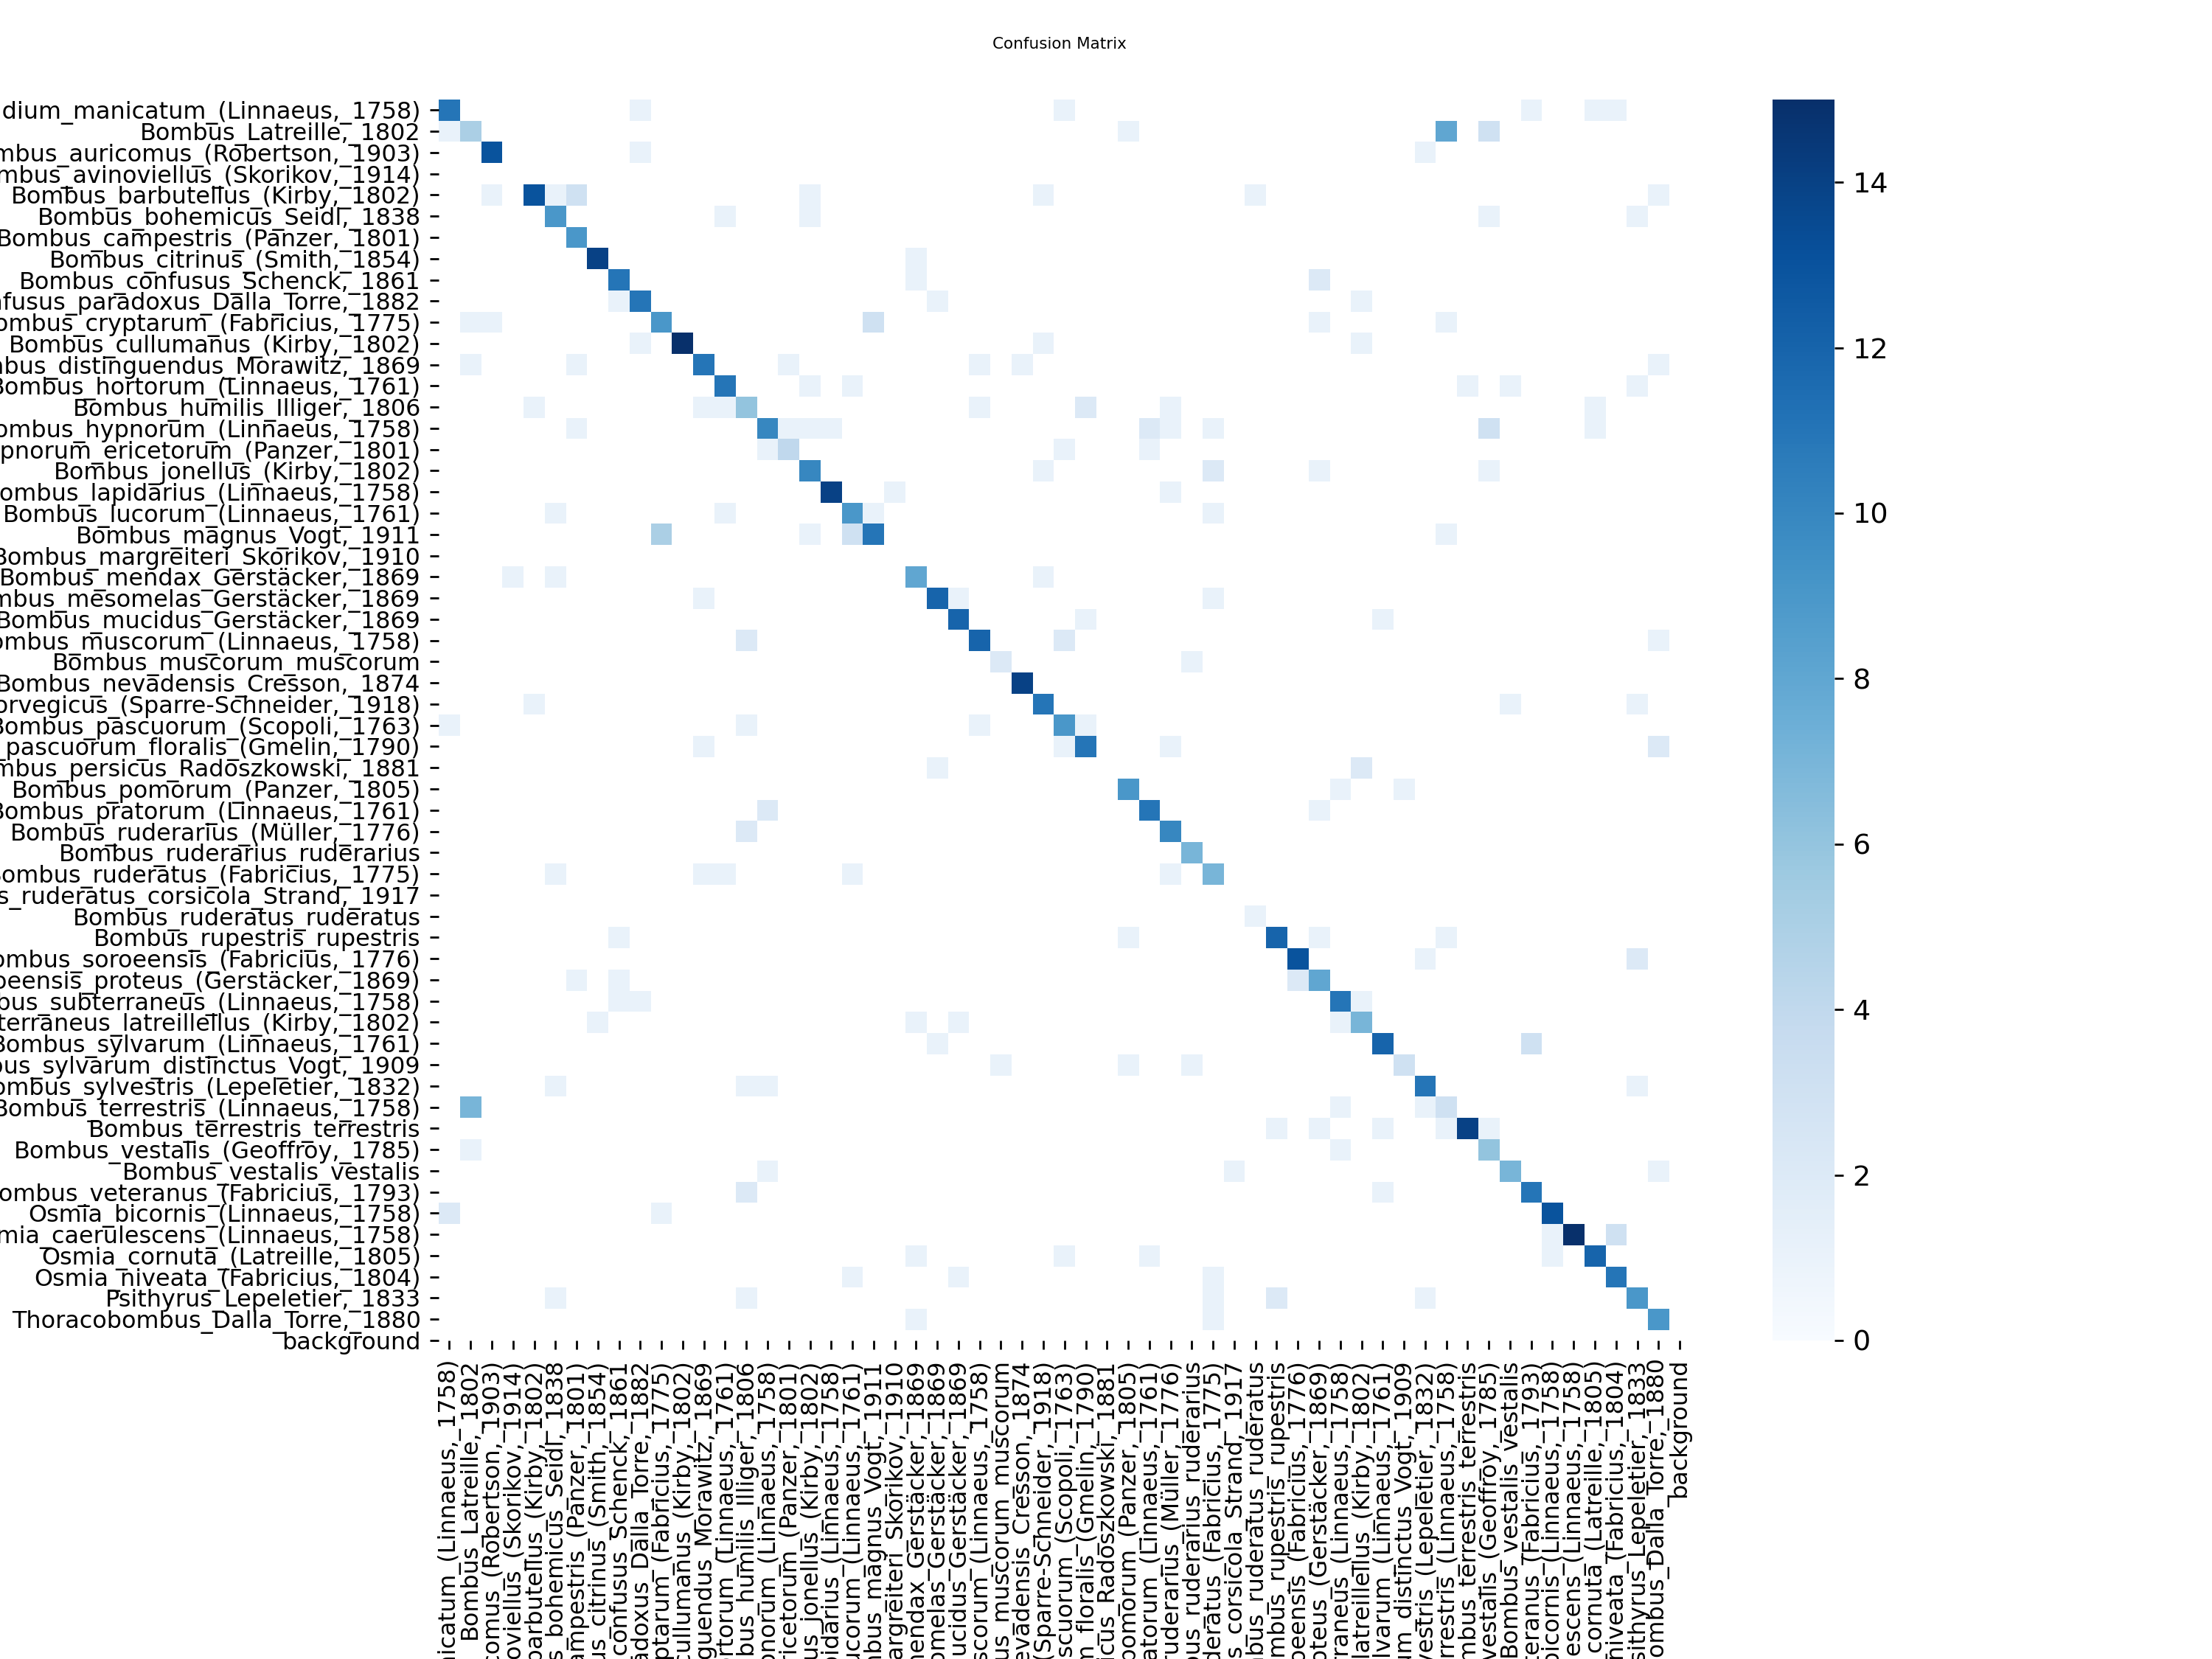

In [34]:
display(Image(filename=results_dir / "confusion_matrix.png"))

In [33]:
!cp /content/runs/classify/yolov8m-cls_augmented/results.csv /content/drive/MyDrive/Insect\ Detection/utils/resultsV2.csv